In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = "retina"

In [2]:
from kpm_linreg import *
from bong.src import bbb, blr, bog, bong, experiment_utils
from bong.util import run_rebayes_algorithm, tune_init_hyperparam

print(AGENT_TYPES)


['fg-bong', 'fg-l-bong', 'fg-rep-bong', 'fg-rep-l-bong', 'fg-blr', 'fg-bog', 'fg-rep-bog', 'fg-bbb', 'fg-rep-bbb']


In [5]:

#python  bong/experiments/kpm_linreg.py  --debug True

#python  bong/experiments/kpm_linreg.py  --agents fg-bong fg-l-bong fg-blr fg-bog fg-bbb
#python  bong/experiments/kpm_linreg.py  --agents fg-rep-bong fg-rep-l-bong fg-rep-bog fg-rep-bbb

parser = argparse.ArgumentParser()
    
  # Data parameters
parser.add_argument("--num_examples", type=int, default=500)
parser.add_argument("--param_dim", type=int, default=10)
parser.add_argument("--key", type=int, default=0)
parser.add_argument("--emission_noise", type=float, default=1.0)

# Model parameters
parser.add_argument("--agents", type=str, nargs="+",
                    default=["fg-bong",  "fg-blr", "fg-bog", "fg-bbb"], choices=AGENT_TYPES)
parser.add_argument("--num_samples", type=int, nargs="+", 
                    default=[100])
parser.add_argument("--learning_rate", type=int, nargs="+", 
                    default=[0.001, 0.005, 0.01, 0.05])
parser.add_argument("--tune_learning_rate", type=bool, default=False)

#https://stackoverflow.com/questions/30656777/how-to-call-module-written-with-argparse-in-ipython-notebook
#args = parser.parse_args()
args = parser.parse_args(args=[])
print(args)

#main(args)#


Namespace(num_examples=500, param_dim=10, key=0, emission_noise=1.0, agents=['fg-bong', 'fg-blr', 'fg-bog', 'fg-bbb'], num_samples=[100], learning_rate=[0.001, 0.005, 0.01, 0.05], tune_learning_rate=False)


Running fg-bong-MC100...
	KL-Div: 0.0172, Time: 0.46s
Running fg-blr-MC100-LR0_001...
	KL-Div: 7.1816, Time: 1.44s
Running fg-blr-MC100-LR0_005...
	KL-Div: 1.6189, Time: 1.44s
Running fg-blr-MC100-LR0_01...
	KL-Div: 0.4641, Time: 1.43s
Running fg-blr-MC100-LR0_05...
	KL-Div: 0.0028, Time: 1.42s
Running fg-bog-MC100-LR0_001...
	KL-Div: 18.8436, Time: 0.46s
Running fg-bog-MC100-LR0_005...
	KL-Div: 16.4101, Time: 0.49s
Running fg-bog-MC100-LR0_01...
	KL-Div: 15.1817, Time: 0.45s
Running fg-bog-MC100-LR0_05...
	KL-Div: nan, Time: 0.45s
Running fg-bbb-MC100-LR0_001...
	KL-Div: 11.5294, Time: 1.65s
Running fg-bbb-MC100-LR0_005...
	KL-Div: 9.3713, Time: 1.56s
Running fg-bbb-MC100-LR0_01...
	KL-Div: 8.6634, Time: 1.62s
Running fg-bbb-MC100-LR0_05...
	KL-Div: nan, Time: 0.76s


ValueError: Unrecognized marker style '*;'

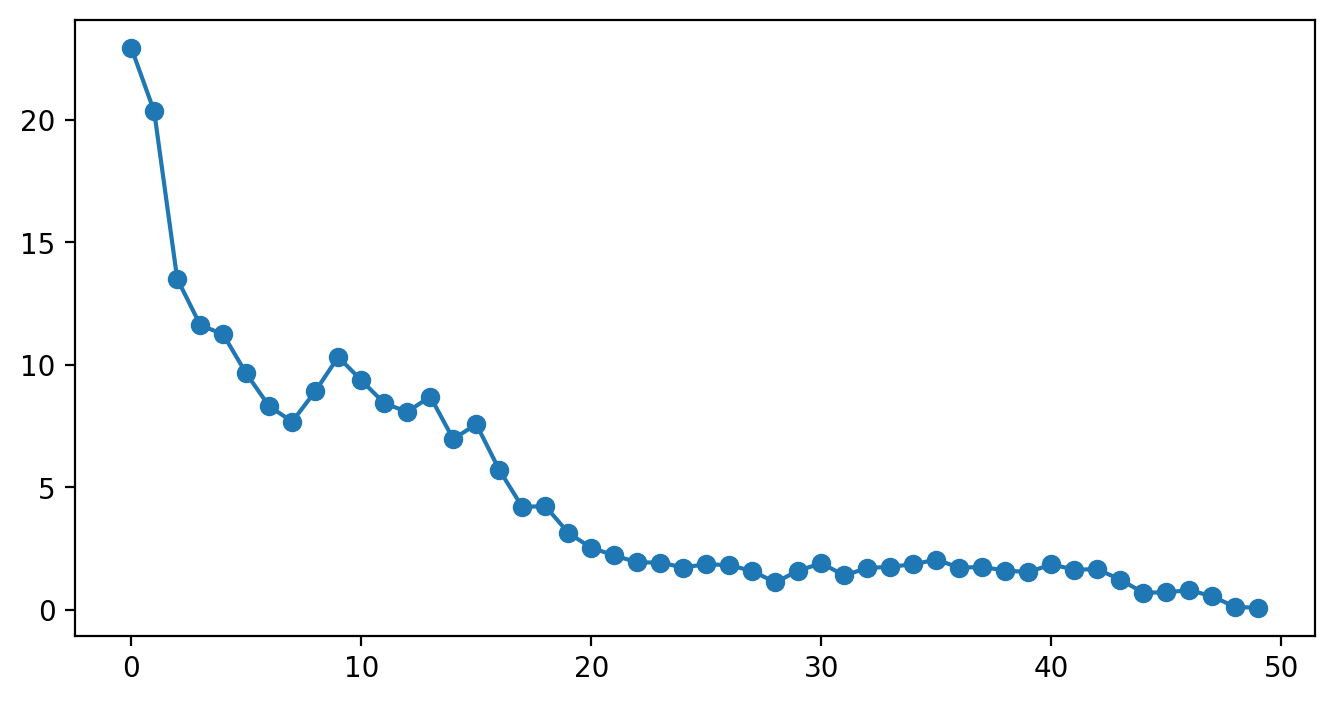

In [6]:
data, subkey = make_data(args)
init_kwargs, callback = init(args, data)
prior, post = compute_prior_post(args, data)
 

agent_queue, subkey = make_agent_queue(subkey, args, init_kwargs, None, data['X_tr'], data['Y_tr'])
result_dict = run_agents(subkey, agent_queue, data, callback)
  
ttl = f"linreg-d{args.param_dim}"
curr_path = None
plot_results(result_dict, curr_path, ttl)


In [10]:
r=list(result_dict.values())[0]
(time, kldiv, nll, nlpd) = r
T=len(kldiv)
ndx = jnp.array(range(0, T, 10))
print(list(ndx))
kk = kldiv[ndx]
print(kk)
print(kldiv[-20:])


[Array(0, dtype=int32), Array(10, dtype=int32), Array(20, dtype=int32), Array(30, dtype=int32), Array(40, dtype=int32), Array(50, dtype=int32), Array(60, dtype=int32), Array(70, dtype=int32), Array(80, dtype=int32), Array(90, dtype=int32), Array(100, dtype=int32), Array(110, dtype=int32), Array(120, dtype=int32), Array(130, dtype=int32), Array(140, dtype=int32), Array(150, dtype=int32), Array(160, dtype=int32), Array(170, dtype=int32), Array(180, dtype=int32), Array(190, dtype=int32), Array(200, dtype=int32), Array(210, dtype=int32), Array(220, dtype=int32), Array(230, dtype=int32), Array(240, dtype=int32), Array(250, dtype=int32), Array(260, dtype=int32), Array(270, dtype=int32), Array(280, dtype=int32), Array(290, dtype=int32), Array(300, dtype=int32), Array(310, dtype=int32), Array(320, dtype=int32), Array(330, dtype=int32), Array(340, dtype=int32), Array(350, dtype=int32), Array(360, dtype=int32), Array(370, dtype=int32), Array(380, dtype=int32), Array(390, dtype=int32), Array(400,